### Fetching the Dataset

In [1]:
# %pip install kaggle
# !kaggle datasets download -d paramaggarwal/fashion-product-images-small

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 696.2 kB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 1.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 1.6 MB/s eta 0:00:00a 0:00:01
  Created wheel for kaggle: filename=kaggle-1.6.14-py3-none-any.whl size=105119 sha256=b1e55c0355da8faca4056fad777385ecf9dfd289388dc634533ade67b810512c
  Stored in directory: /home/codespace/.cache/pip/wheels/d7/54/06/8a8f40cb39536605feb9acaacd0237a95eba39e5065e6392f4
Successfully built kaggle
Dataset URL: https://www.kaggle.com/datasets/paramaggarwal/fashion-product-images-small
License(s): copyright-authors
100%|███████████████████████████████████████▉| 565M/565M

### Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# read data/styles.csv using pd
df = pd.read_csv('data/styles.csv', delimiter=',', on_bad_lines='skip')
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [3]:
df.columns

Index(['id', 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season', 'year', 'usage', 'productDisplayName'],
      dtype='object')

In [4]:
df.shape

(44424, 10)

In [5]:
# percentage of missing values in each column
df.isnull().sum() / df.shape[0] * 100

# drop rows with missing values
df = df.dropna(subset=['image'])

id                    0.000000
gender                0.000000
masterCategory        0.000000
subCategory           0.000000
articleType           0.000000
baseColour            0.033766
season                0.047272
year                  0.002251
usage                 0.713578
productDisplayName    0.015757
dtype: float64

In [6]:
# drop rows with missing values
df.dropna(inplace=True)

In [7]:
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [8]:
# check if there are any missing values
df.isnull().sum()

id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
dtype: int64

In [9]:
# drop rows with missing values
df.dropna(inplace=True)
df.shape

(44077, 10)

In [10]:
# arrange in ascending order of id
# df.sort_values('id', inplace=True)

##### Check Uniques

In [11]:
# check the unique values in the column 'masterCategory'
data['masterCategory'].unique()

NameError: name 'data' is not defined

In [ ]:
# check the unique values in the column 'subCategory'
data['subCategory'].unique()

array(['Topwear', 'Bottomwear', 'Watches', 'Socks', 'Shoes', 'Belts',
       'Flip Flops', 'Bags', 'Innerwear', 'Sandal', 'Shoe Accessories',
       'Fragrance', 'Jewellery', 'Lips', 'Saree', 'Eyewear', 'Nails',
       'Scarves', 'Dress', 'Loungewear and Nightwear', 'Wallets',
       'Apparel Set', 'Headwear', 'Mufflers', 'Skin Care', 'Makeup',
       'Free Gifts', 'Ties', 'Accessories', 'Skin', 'Beauty Accessories',
       'Water Bottle', 'Eyes', 'Bath and Body', 'Gloves',
       'Sports Accessories', 'Cufflinks', 'Sports Equipment', 'Stoles',
       'Hair', 'Perfumes', 'Home Furnishing', 'Umbrellas', 'Wristbands',
       'Vouchers'], dtype=object)

In [ ]:
# check the unique values in the column 'articleType'
data['articleType'].unique()

# count the number of unique values in the column 'articleType'
data['articleType'].nunique()

KeyError: 'articleType'

In [ ]:
# check the unique values in the column 'baseColour'
data['baseColour'].unique()

array(['Navy Blue', 'Blue', 'Silver', 'Black', 'Grey', 'Green', 'Purple',
       'White', 'Beige', 'Brown', 'Bronze', 'Teal', 'Copper', 'Pink',
       'Off White', 'Maroon', 'Red', 'Khaki', 'Orange', 'Yellow',
       'Charcoal', 'Gold', 'Steel', 'Tan', 'Multi', 'Magenta', 'Lavender',
       'Sea Green', 'Cream', 'Peach', 'Olive', 'Skin', 'Burgundy',
       'Coffee Brown', 'Grey Melange', 'Rust', 'Rose', 'Lime Green',
       'Mauve', 'Turquoise Blue', 'Metallic', 'Mustard', 'Taupe', 'Nude',
       'Mushroom Brown', 'Fluorescent Green'], dtype=object)

In [ ]:
# check the unique values in the column 'season'
data['season'].unique()

array(['Fall', 'Summer', 'Winter', 'Spring'], dtype=object)

In [ ]:
# check the unique values in the column 'year'
data['year'].unique()

array([2011., 2012., 2016., 2017., 2015., 2014., 2010., 2013., 2018.,
       2019., 2007., 2009., 2008.])

In [ ]:
# check the unique values in the column 'usage'
data['usage'].unique()

array(['Casual', 'Ethnic', 'Formal', 'Sports', 'Smart Casual', 'Travel',
       'Party', 'Home'], dtype=object)

In [ ]:
# check the unique values in the column 'productDisplayName'
data['productDisplayName'].unique()

# count the total number of unique values in the column 'productDisplayName'
data['productDisplayName'].nunique()

30806

In [ ]:
# treat year as integer
data['year'] = data['year'].astype(int)
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,Puma Men Grey T-shirt


In [ ]:
# make a column called image which contains the path of the image
data['imagePath'] = 'images/' + data['id'].astype(str) + '.jpg'

# check the first 5 rows of the data
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,imagePath
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt,images/15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans,images/39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016,Casual,Titan Women Silver Watch,images/59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,Manchester United Men Solid Black Track Pants,images/21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,Puma Men Grey T-shirt,images/53759.jpg


### EDA

In [12]:
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [13]:
# count the number of each category in the column 'masterCategory'
data['masterCategory'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Master Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


NameError: name 'data' is not defined

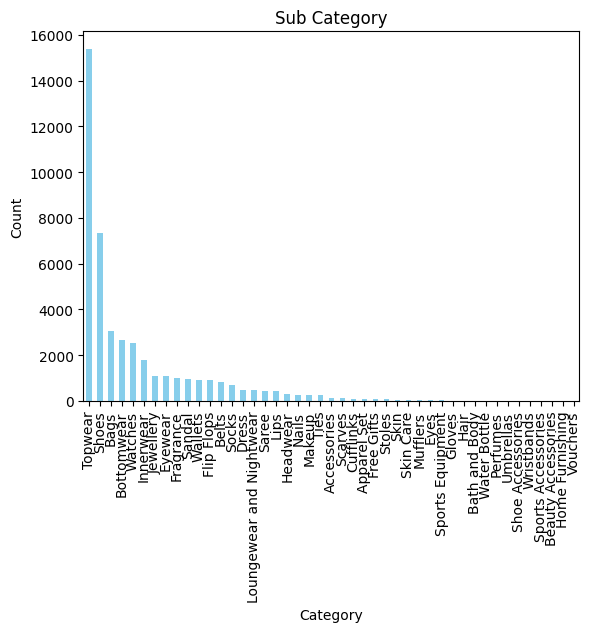

In [ ]:
# count the number of each category in the column 'subCategory'

data['subCategory'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Sub Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


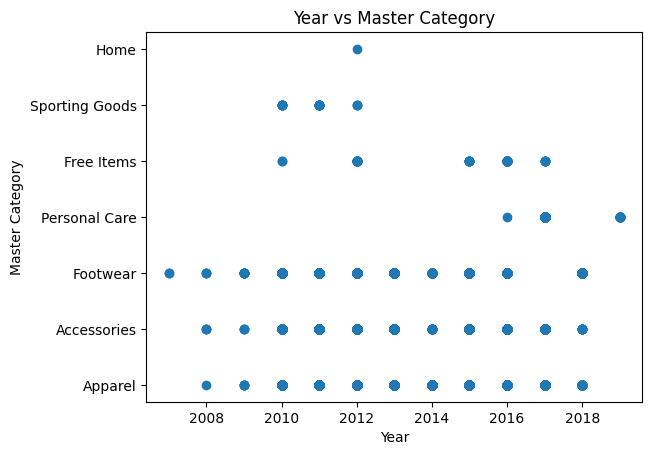

In [ ]:
# plot scatterplots for the columns 'year' and 'masterCategory'
plt.scatter(data['year'], data['masterCategory'])
plt.title('Year vs Master Category')
plt.xlabel('Year')
plt.ylabel('Master Category')
plt.show()


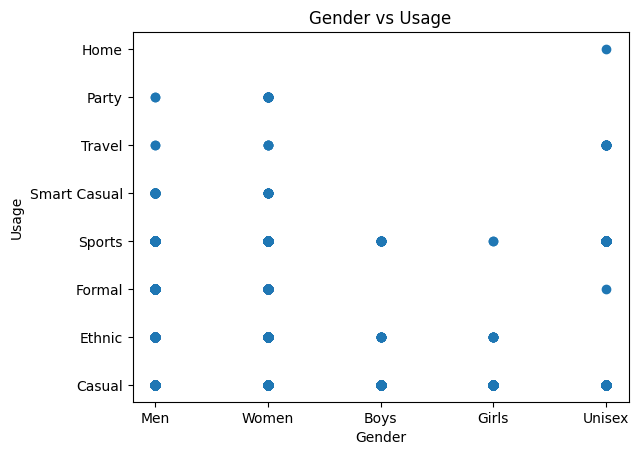

In [ ]:
# plot scatterplots for the columns 'gender' and 'usage'
plt.scatter(data['gender'], data['usage'])
plt.title('Gender vs Usage')
plt.xlabel('Gender')
plt.ylabel('Usage')
plt.show()

# Finding1: Most of the products used at Home are Unisex
# Finding2: Sports products are popular irrespective of gender

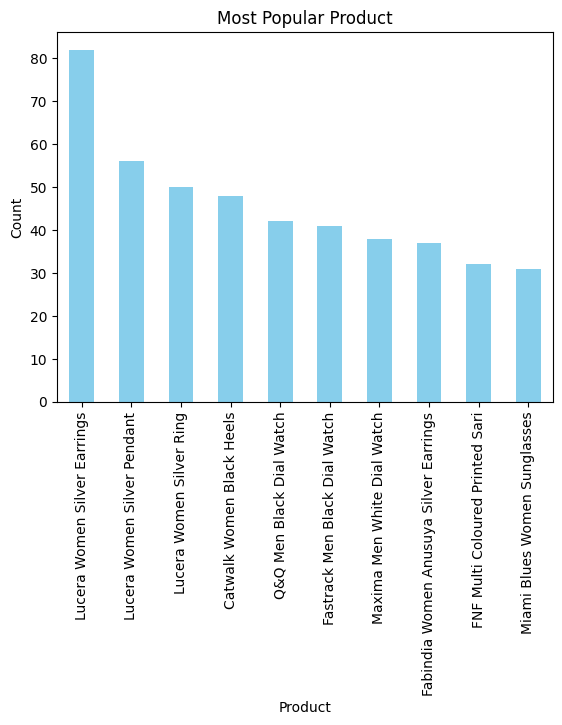

In [ ]:
# Find facts about data by EDA
# 1. Find the most popular product
data['productDisplayName'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Most Popular Product')
plt.xlabel('Product')
plt.ylabel('Count')
plt.show()


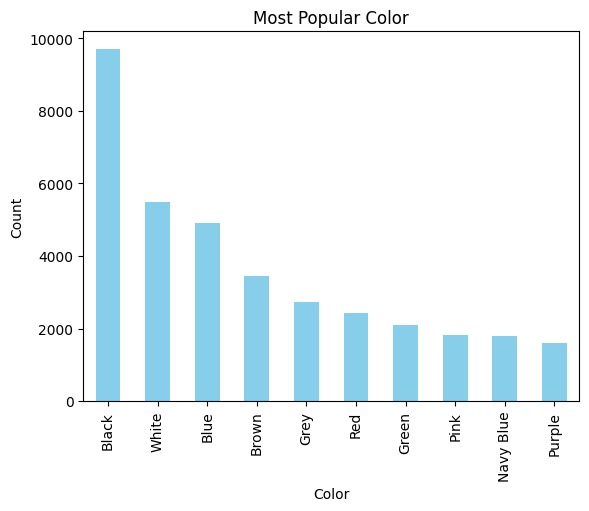

gender
Boys       Blue
Girls      Pink
Men       Black
Unisex    Black
Women     Black
Name: baseColour, dtype: object


In [ ]:
# 2. Find the most popular color
data['baseColour'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Most Popular Color')
plt.xlabel('Color')
plt.ylabel('Count')
plt.show()

# Find the most popular color for each gender
popular_color = df.groupby('gender')['baseColour'].agg(pd.Series.mode)
print(popular_color)

In [ ]:
# Create a simplified color category
data['simplifiedColor'] = data['baseColour'].apply(lambda x: 'Bright' if x in ['Red', 'Yellow', 'Pink'] else 'Dark' if x in ['Black', 'Navy Blue'] else 'Neutral')

# Verify new feature
print(data['simplifiedColor'].value_counts())

popular_simplified_color = df.groupby('gender')['simplifiedColor'].agg(pd.Series.mode)
print(popular_simplified_color)

simplifiedColor
Neutral    27559
Dark       11484
Bright      5034
Name: count, dtype: int64
gender
Boys      Neutral
Girls     Neutral
Men       Neutral
Unisex    Neutral
Women     Neutral
Name: simplifiedColor, dtype: object


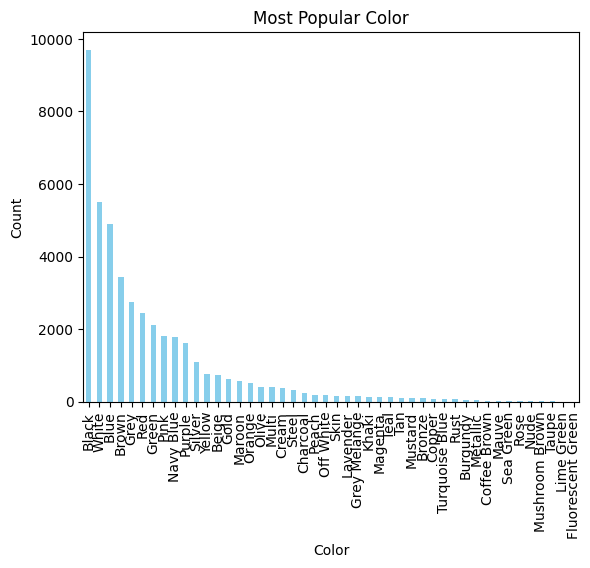

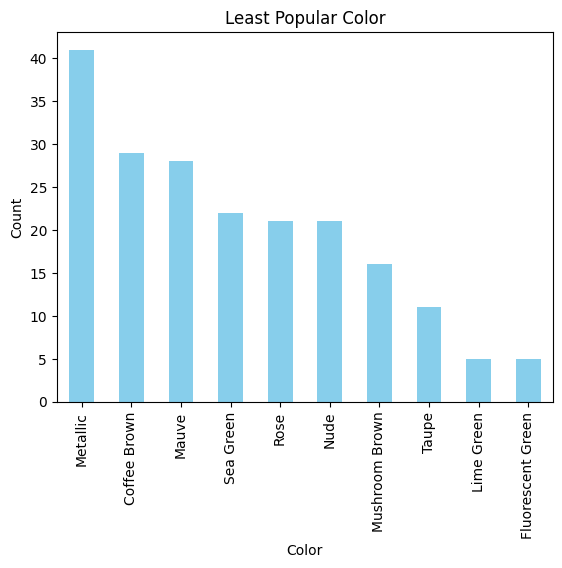

In [ ]:
# 2. Find the most popular color and least popular color
data['baseColour'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Most Popular Color')
plt.xlabel('Color')
plt.ylabel('Count')
plt.show()

data['baseColour'].value_counts().tail(10).plot(kind='bar', color='skyblue')
plt.title('Least Popular Color')
plt.xlabel('Color')
plt.ylabel('Count')
plt.show()

# also check the least popular color for each gender
least_popular_color = df.groupby(data


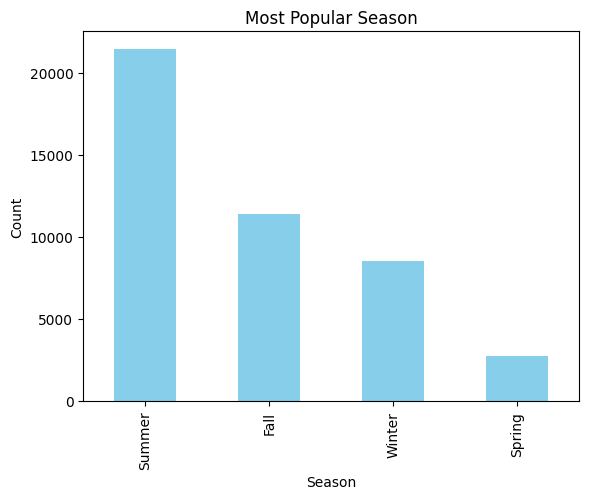

In [ ]:
# 3. Find the most popular season
data['season'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Most Popular Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

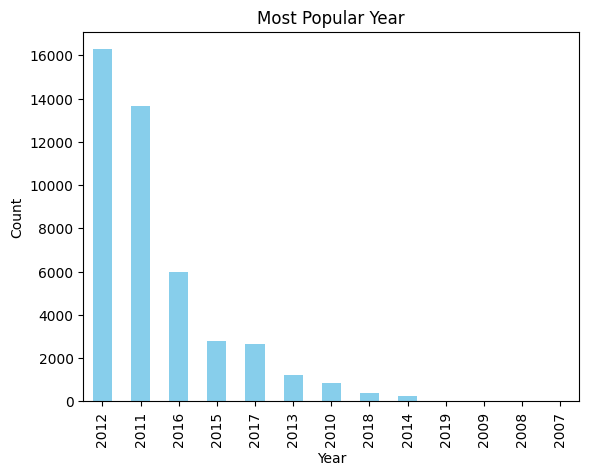

In [ ]:
# 4. Find the most popular year
data['year'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Most Popular Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [ ]:
# percentage of missing values in each column
df.isnull().sum() / df.shape[0] * 100

# find garbage values
# assign lable to each mastercategory
# check if path exists of image 
# check for feature recommendation

# check which featurrs are important and do fetaure engineering